In [87]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from scipy import stats
import statistics
from math import sqrt
from sklearn.preprocessing import StandardScaler
print("ready")

ready


In [88]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [89]:
df = df.drop(columns='ID#', axis=1)

In [90]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

In [91]:
df_scaled.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [92]:
clmns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']

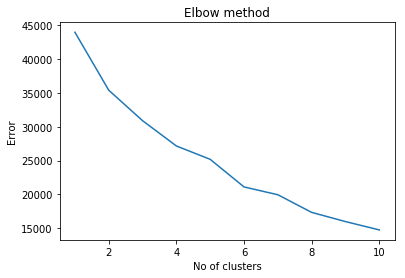

In [93]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_scaled)
    kmeans.fit(df_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [94]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
labels = kmeans.labels_

In [95]:
df['clusters'] = labels

In [96]:
clmns.extend(['clusters'])

In [97]:
print(df[clmns].groupby(['clusters']).mean())

                Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clusters                                                                
0          43438.468415    41.883989   1.222090   1.019468   1.000397   
1         190251.952381   458.734694   2.224490   1.040816   1.000000   
2         117283.428118    60.254964   3.700556   1.002383   1.001589   
3         119660.491803  5351.065574   2.000000   1.000000   1.000000   
4         138061.400000    78.800000   3.466667   1.000000   4.066667   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clusters                                                                  
0          4696.888359     6.930473         199.267382         0.620183   
1         32907.979592    28.231293        5685.823129        16.523810   
2         39201.023828    18.772836         346.313741         1.035743   
3         18683.475410    12.229508         963.639344         2.868852   
4         93927.866667    28.066667   

Text(30.791519097222235, 0.5, 'Balance')

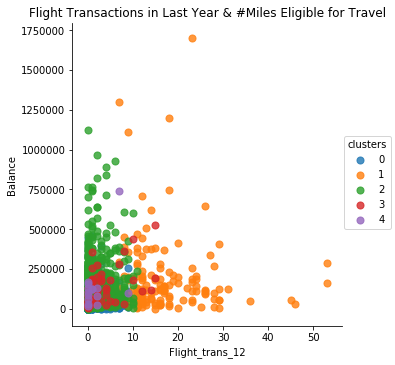

In [98]:
sns.lmplot('Flight_trans_12','Balance', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 50})
plt.title('Flight Transactions in Last Year & #Miles Eligible for Travel')
plt.xlabel('Flight_trans_12')
plt.ylabel('Balance')

Text(30.97809678819445, 0.5, 'Bonus_miles')

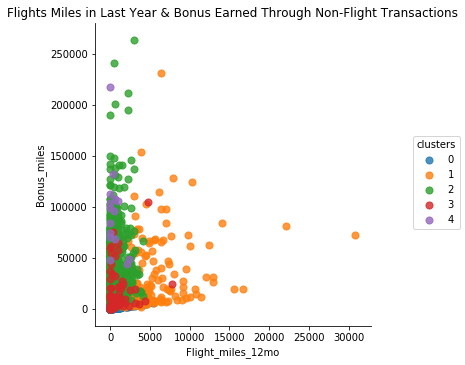

In [99]:
sns.lmplot('Flight_miles_12mo','Bonus_miles', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 50})
plt.title('Flights Miles in Last Year & Bonus Earned Through Non-Flight Transactions')
plt.xlabel('Flight_miles_12mo')
plt.ylabel('Bonus_miles')

In [100]:
df = df.sort_values(by=['clusters'])
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2546,34855,0,1,1,1,230,3,0,0,2882,0,0
2547,34464,0,2,1,1,5312,5,0,0,2886,0,0
2550,65812,0,1,1,1,185,2,0,0,2854,0,0
2551,34177,1754,2,1,1,7072,16,350,1,2867,0,0
